# Welcome to SmartInvestment.com 
Our company sells investment funds tailored to maximise results and minimise risk. Our star fund is called FAANG+_forever.

### About FAANG+_forever
If we take a look into the market data of each one of these we can find out how well we are performaing. Stocks included are from META, NFLX, aapl, TSLA, GOOGL, AAMZ.

In [142]:
#Importing packages
import numpy as np
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [143]:
#Importing dataframes
df_aapl = pd.concat([pd.read_csv('market_data/AAPL_2.csv', parse_dates=['Date'], ), pd.read_csv('market_data/AAPL_1.csv', parse_dates=['Date'])], ignore_index=True)
df_amzn = pd.concat([pd.read_csv('market_data/AMZN_2.csv', parse_dates=['Date'], ), pd.read_csv('market_data/AMZN_1.csv', parse_dates=['Date'])], ignore_index=True)
df_googl = pd.concat([pd.read_csv('market_data/GOOGL_2.csv', parse_dates=['Date'], ), pd.read_csv('market_data/GOOGL_1.csv', parse_dates=['Date'])], ignore_index=True)
df_meta = pd.concat([pd.read_csv('market_data/META_2.csv', parse_dates=['Date'], ), pd.read_csv('market_data/META_1.csv', parse_dates=['Date'])], ignore_index=True)
df_nflx = pd.concat([pd.read_csv('market_data/NFLX_2.csv', parse_dates=['Date'], ), pd.read_csv('market_data/NFLX_1.csv', parse_dates=['Date'])], ignore_index=True)
df_spx = pd.concat([pd.read_csv('market_data/SPX_2.csv', parse_dates=['Date'], ), pd.read_csv('market_data/SPX_1.csv', parse_dates=['Date'])], ignore_index=True)
df_tsla = pd.concat([pd.read_csv('market_data/TSLA_2.csv', parse_dates=['Date'], ), pd.read_csv('market_data/TSLA_1.csv', parse_dates=['Date'])], ignore_index=True)

#Parsing dates
df_aapl['Date'] = pd.to_datetime(df_aapl['Date'], utc=True).dt.date
df_aapl['Date'] = pd.to_datetime(df_aapl['Date'], format = '%Y%m')
df_amzn['Date'] = pd.to_datetime(df_amzn['Date'], utc=True).dt.date
df_amzn['Date'] = pd.to_datetime(df_amzn['Date'], format = '%Y%m')
df_googl['Date'] = pd.to_datetime(df_googl['Date'], utc=True).dt.date
df_googl['Date'] = pd.to_datetime(df_googl['Date'], format = '%Y%m')
df_meta['Date'] = pd.to_datetime(df_meta['Date'], utc=True).dt.date
df_meta['Date'] = pd.to_datetime(df_meta['Date'], format = '%Y%m')
df_nflx['Date'] = pd.to_datetime(df_nflx['Date'], utc=True).dt.date
df_nflx['Date'] = pd.to_datetime(df_nflx['Date'], format = '%Y%m')
df_tsla['Date'] = pd.to_datetime(df_tsla['Date'], utc=True).dt.date
df_tsla['Date'] = pd.to_datetime(df_tsla['Date'], format = '%Y%m')
df_spx['Date'] = pd.to_datetime(df_spx['Date'], utc=True).dt.date
df_spx['Date'] = pd.to_datetime(df_spx['Date'], format = '%Y%m')

#### Time to find some insights...
We need to provide to our investors a quarter by quarter report with the performance of the fund comparing it with the performance of the SPX500. Let's take a look at our datasets.

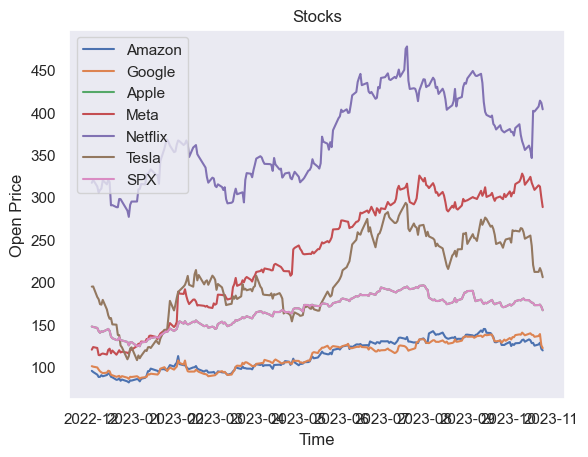

In [144]:
sns.set(style="dark")
sns.lineplot(x='Date', y='Close', data=df_amzn, label='Amazon')
sns.lineplot(x='Date', y='Close', data=df_googl, label='Google')
sns.lineplot(x='Date', y='Close', data=df_aapl, label='Apple')
sns.lineplot(x='Date', y='Close', data=df_meta, label='Meta')
sns.lineplot(x='Date', y='Close', data=df_nflx, label='Netflix')
sns.lineplot(x='Date', y='Close', data=df_tsla, label='Tesla')
sns.lineplot(x='Date', y='Close', data=df_aapl, label='SPX')
plt.title('Stocks')
plt.xlabel('Time')
plt.ylabel('Open Price')
plt.show()

As the data is incomplete, we will remove data from first and last week. Considering 2022-12-01 is week 48 of 2022 and 2023-10-26 is week 43 of 2023 for all of the datasets. Next group by quarter.
### SPX

In [145]:
df_spx['WeekNumber'] = pd.to_datetime(df_spx['Date']).dt.isocalendar().week
df_spx = df_spx[~((df_spx['WeekNumber'] == df_spx['Date'].min().isocalendar().week) & (df_spx['Date'].dt.year == 2022))]
df_spx = df_spx[~((df_spx['WeekNumber'] == df_spx['Date'].max().isocalendar().week) & (df_spx['Date'].dt.year == 2023))]
df_spx['Quarter'] = df_spx['Date'].dt.quarter
quarter_mapping = {1: 'Q1', 2: 'Q2', 3: 'Q3', 4: 'Q4'}
df_spx['Quarter'] = df_spx['Quarter'].map(quarter_mapping)
df_spx['Gain_Loss_Percentage'] = df_spx['Close'].pct_change() * 100
# print(df_spx[['Date', 'Quarter', 'Gain_Loss_Percentage']])
pivot_table_spx = df_spx.pivot_table(index='Quarter', values='Gain_Loss_Percentage', aggfunc='sum')
print(pivot_table_spx)

         Gain_Loss_Percentage
Quarter                      
Q1                   7.136581
Q2                   8.148288
Q3                  -3.570565
Q4                  -5.394436


### Fund data
Apple

In [146]:
df_aapl['WeekNumber'] = pd.to_datetime(df_aapl['Date']).dt.isocalendar().week
df_aapl = df_aapl[~((df_aapl['WeekNumber'] == df_aapl['Date'].min().isocalendar().week) & (df_aapl['Date'].dt.year == 2022))]
df_aapl = df_aapl[~((df_aapl['WeekNumber'] == df_aapl['Date'].max().isocalendar().week) & (df_aapl['Date'].dt.year == 2023))]
df_aapl['Quarter'] = df_aapl['Date'].dt.quarter
quarter_mapping = {1: 'Q1', 2: 'Q2', 3: 'Q3', 4: 'Q4'}
df_aapl['Quarter'] = df_aapl['Quarter'].map(quarter_mapping)
df_aapl['Gain_Loss_Percentage'] = df_aapl['Close'].pct_change() * 100
# print(df_aapl[['Date', 'Quarter', 'Gain_Loss_Percentage']])
pivot_table_aapl = df_aapl.pivot_table(index='Quarter', values='Gain_Loss_Percentage', aggfunc='sum')
print(pivot_table_aapl)

         Gain_Loss_Percentage
Quarter                      
Q1                  24.746930
Q2                  16.798540
Q3                 -11.773821
Q4                 -10.690093


Amazon

In [147]:
df_amzn['WeekNumber'] = pd.to_datetime(df_amzn['Date']).dt.isocalendar().week
df_amzn = df_amzn[~((df_amzn['WeekNumber'] == df_amzn['Date'].min().isocalendar().week) & (df_amzn['Date'].dt.year == 2022))]
df_amzn = df_amzn[~((df_amzn['WeekNumber'] == df_amzn['Date'].max().isocalendar().week) & (df_amzn['Date'].dt.year == 2023))]
df_amzn['Quarter'] = df_amzn['Date'].dt.quarter
quarter_mapping = {1: 'Q1', 2: 'Q2', 3: 'Q3', 4: 'Q4'}
df_amzn['Quarter'] = df_amzn['Quarter'].map(quarter_mapping)
df_amzn['Gain_Loss_Percentage'] = df_amzn['Close'].pct_change() * 100
# print(df_amzn[['Date', 'Quarter', 'Gain_Loss_Percentage']])
pivot_table_amzn = df_amzn.pivot_table(index='Quarter', values='Gain_Loss_Percentage', aggfunc='sum')
print(pivot_table_amzn)

         Gain_Loss_Percentage
Quarter                      
Q1                  22.539472
Q2                  24.547277
Q3                  -1.290676
Q4                  -8.893455


Google

In [148]:
df_googl['WeekNumber'] = pd.to_datetime(df_googl['Date']).dt.isocalendar().week
df_googl = df_googl[~((df_googl['WeekNumber'] == df_googl['Date'].min().isocalendar().week) & (df_googl['Date'].dt.year == 2022))]
df_googl = df_googl[~((df_googl['WeekNumber'] == df_googl['Date'].max().isocalendar().week) & (df_googl['Date'].dt.year == 2023))]
df_googl['Quarter'] = df_googl['Date'].dt.quarter
quarter_mapping = {1: 'Q1', 2: 'Q2', 3: 'Q3', 4: 'Q4'}
df_googl['Quarter'] = df_googl['Quarter'].map(quarter_mapping)
df_googl['Gain_Loss_Percentage'] = df_googl['Close'].pct_change() * 100
# print(df_googl[['Date', 'Quarter', 'Gain_Loss_Percentage']])
pivot_table_googl = df_googl.pivot_table(index='Quarter', values='Gain_Loss_Percentage', aggfunc='sum')
print(pivot_table_googl)

         Gain_Loss_Percentage
Quarter                      
Q1                  18.036199
Q2                  15.186577
Q3                   9.717169
Q4                  -7.965658


Meta

In [149]:
df_meta['WeekNumber'] = pd.to_datetime(df_meta['Date']).dt.isocalendar().week
df_meta = df_meta[~((df_meta['WeekNumber'] == df_meta['Date'].min().isocalendar().week) & (df_meta['Date'].dt.year == 2022))]
df_meta = df_meta[~((df_meta['WeekNumber'] == df_meta['Date'].max().isocalendar().week) & (df_meta['Date'].dt.year == 2023))]
df_meta['Quarter'] = df_meta['Date'].dt.quarter
quarter_mapping = {1: 'Q1', 2: 'Q2', 3: 'Q3', 4: 'Q4'}
df_meta['Quarter'] = df_meta['Quarter'].map(quarter_mapping)
df_meta['Gain_Loss_Percentage'] = df_meta['Close'].pct_change() * 100
# print(df_meta[['Date', 'Quarter', 'Gain_Loss_Percentage']])
pivot_table_meta = df_meta.pivot_table(index='Quarter', values='Gain_Loss_Percentage', aggfunc='sum')
print(pivot_table_meta)

         Gain_Loss_Percentage
Quarter                      
Q1                  60.641672
Q2                  31.864143
Q3                   5.637959
Q4                   2.078543


Netflix

In [150]:
df_nflx['WeekNumber'] = pd.to_datetime(df_nflx['Date']).dt.isocalendar().week
df_nflx = df_nflx[~((df_nflx['WeekNumber'] == df_nflx['Date'].min().isocalendar().week) & (df_nflx['Date'].dt.year == 2022))]
df_nflx = df_nflx[~((df_nflx['WeekNumber'] == df_nflx['Date'].max().isocalendar().week) & (df_nflx['Date'].dt.year == 2023))]
df_nflx['Quarter'] = df_nflx['Date'].dt.quarter
quarter_mapping = {1: 'Q1', 2: 'Q2', 3: 'Q3', 4: 'Q4'}
df_nflx['Quarter'] = df_nflx['Quarter'].map(quarter_mapping)
df_nflx['Gain_Loss_Percentage'] = df_nflx['Close'].pct_change() * 100
# print(df_nflx[['Date', 'Quarter', 'Gain_Loss_Percentage']])
pivot_table_nflx = df_nflx.pivot_table(index='Quarter', values='Gain_Loss_Percentage', aggfunc='sum')
print(pivot_table_nflx)

         Gain_Loss_Percentage
Quarter                      
Q1                  17.847395
Q2                  25.751013
Q3                 -13.917035
Q4                   2.341806


Tesla

In [151]:
df_tsla['WeekNumber'] = pd.to_datetime(df_tsla['Date']).dt.isocalendar().week
df_tsla = df_tsla[~((df_tsla['WeekNumber'] == df_tsla['Date'].min().isocalendar().week) & (df_tsla['Date'].dt.year == 2022))]
df_tsla = df_tsla[~((df_tsla['WeekNumber'] == df_tsla['Date'].max().isocalendar().week) & (df_tsla['Date'].dt.year == 2023))]
df_tsla['Quarter'] = df_tsla['Date'].dt.quarter
quarter_mapping = {1: 'Q1', 2: 'Q2', 3: 'Q3', 4: 'Q4'}
df_tsla['Quarter'] = df_tsla['Quarter'].map(quarter_mapping)
df_tsla['Gain_Loss_Percentage'] = df_tsla['Close'].pct_change() * 100
# print(df_tsla[['Date', 'Quarter', 'Gain_Loss_Percentage']])
pivot_table_tsla = df_tsla.pivot_table(index='Quarter', values='Gain_Loss_Percentage', aggfunc='sum')
print(pivot_table_tsla)

         Gain_Loss_Percentage
Quarter                      
Q1                  58.050537
Q2                  26.177848
Q3                  -1.379148
Q4                 -52.534313


In [152]:
fund_composition_percentage_aapl=0.25
fund_composition_percentage_amzn=0.15
fund_composition_percentage_googl=0.20
fund_composition_percentage_meta=0.15
fund_composition_percentage_nflx=0.10
fund_composition_percentage_tsla=0.15
print(((pivot_table_googl.loc['Q1'].iloc[0]*fund_composition_percentage_googl) + \
        (pivot_table_aapl.loc['Q1'].iloc[0]*fund_composition_percentage_aapl) + \
        (pivot_table_amzn.loc['Q1'].iloc[0]*fund_composition_percentage_amzn) + \
        (pivot_table_meta.loc['Q1'].iloc[0]*fund_composition_percentage_meta) + \
        (pivot_table_nflx.loc['Q1'].iloc[0]*fund_composition_percentage_nflx) + \
        (pivot_table_tsla.loc['Q1'].iloc[0]*fund_composition_percentage_tsla))/6)

5.460577347810894


Now that have seen how our fund is performing overall, lets take a look at the data per week of the fund and SPX.

In [153]:
# Line chart with weekly gain/loss % of the fund and SPX (both in the same chart)
 